<a href="https://colab.research.google.com/github/Sara2539360/Excel/blob/main/Final_ML_Project_E_Comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sara2539360/Final-ML-E-Comm/refs/heads/main/Train.csv')

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (10999, 12)


In [ ]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [ ]:
print("Data Types:\n", df.dtypes)

Data Types:
 ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Bar Chart - Distribution of a Categorical Variable

In [ ]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", cat_columns)

Categorical Columns: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)


Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


## Count plot
Distribution of Gender (Categorical)
This plot will help you understand the distribution of the Gender feature across your dataset, showing how many customers are male and female.



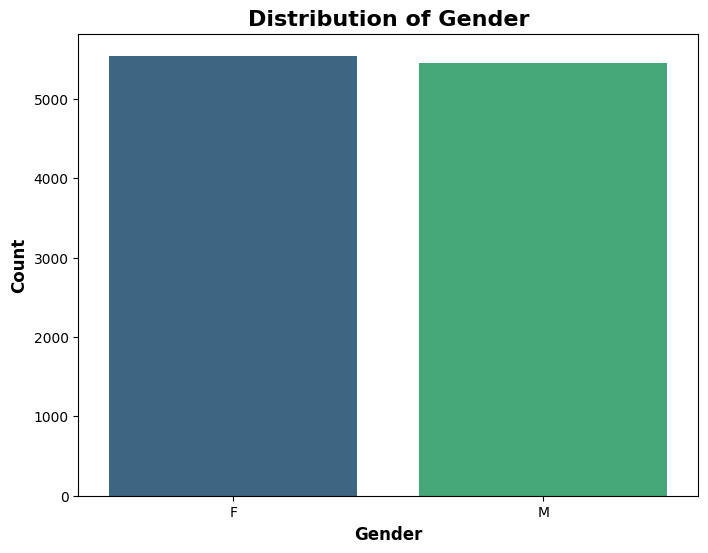

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Distribution of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


## Distribution of Warehouse_block

This plot visualizes how many products are stored in each warehouse block. It will show the number of products in each category of Warehouse_block.



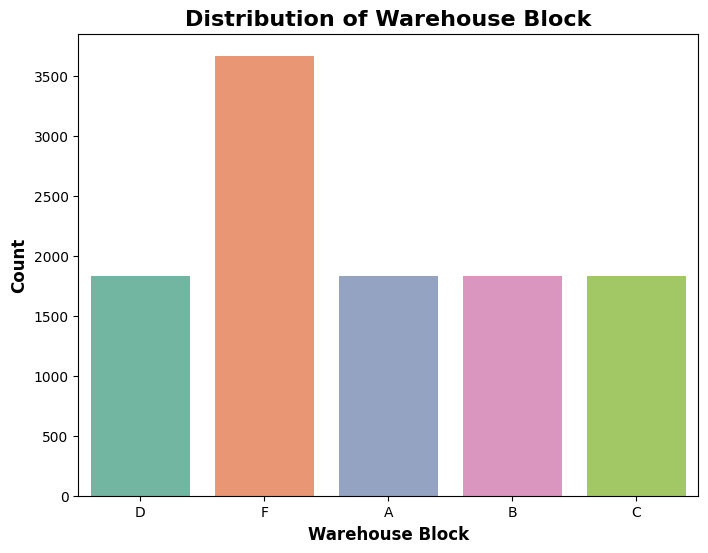

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Warehouse_block', palette='Set2')
plt.title('Distribution of Warehouse Block', fontsize=16, fontweight='bold')
plt.xlabel('Warehouse Block', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


## Box Plot

Relationship between Cost_of_the_Product and Product_importance

This box plot will show the distribution of Cost_of_the_Product across different levels of Product_importance. It helps identify if product importance influences the cost.

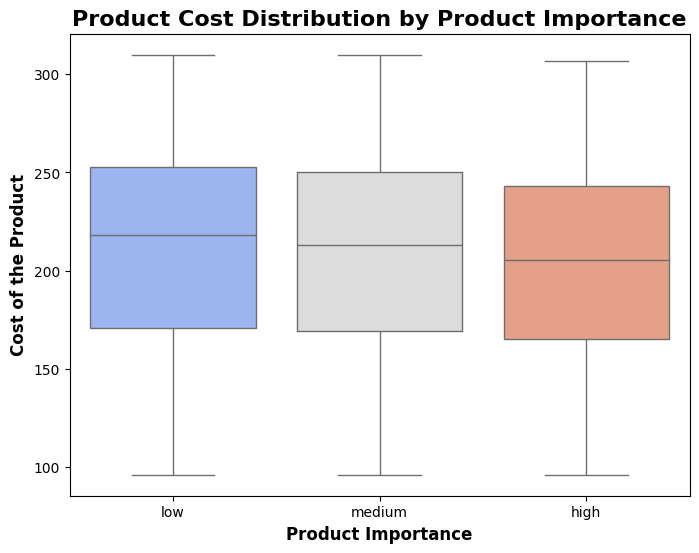

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Product_importance', y='Cost_of_the_Product', palette='coolwarm')
plt.title('Product Cost Distribution by Product Importance', fontsize=16, fontweight='bold')
plt.xlabel('Product Importance', fontsize=12, fontweight='bold')
plt.ylabel('Cost of the Product', fontsize=12, fontweight='bold')
plt.show()


## Histogram

Distribution of Customer_rating

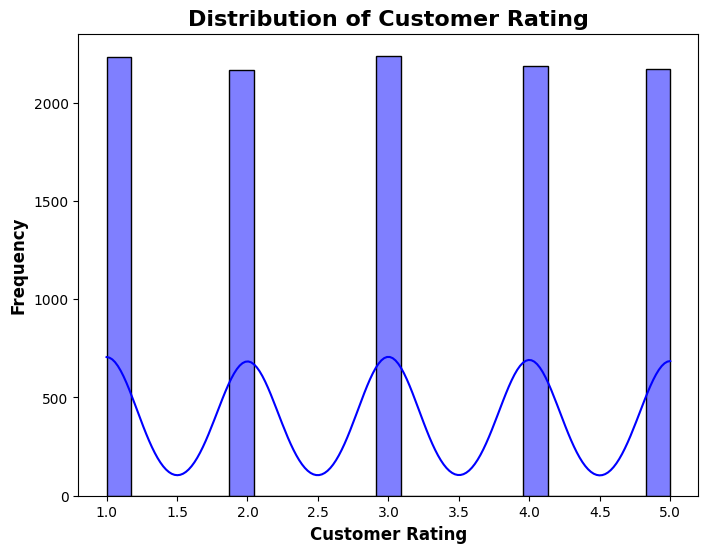

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_rating'], kde=True, color='blue')
plt.title('Distribution of Customer Rating', fontsize=16, fontweight='bold')
plt.xlabel('Customer Rating', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()


## Pie Chart for Reached.on.Time_Y.N

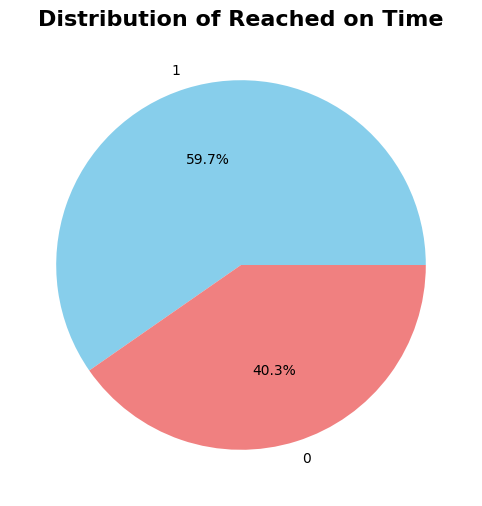

In [ ]:
plt.figure(figsize=(8, 6))
df['Reached.on.Time_Y.N'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Reached on Time', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()


## Violin Plot for Discount_offered by Product_importance

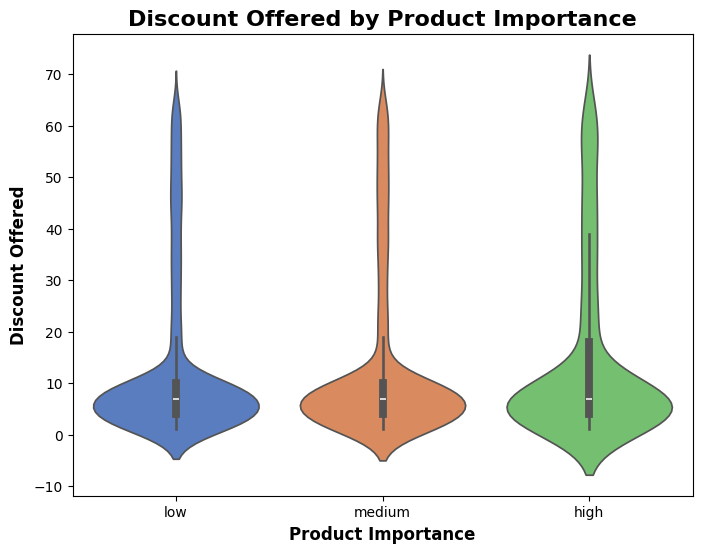

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Product_importance', y='Discount_offered', palette='muted')
plt.title('Discount Offered by Product Importance', fontsize=16, fontweight='bold')
plt.xlabel('Product Importance', fontsize=12, fontweight='bold')
plt.ylabel('Discount Offered', fontsize=12, fontweight='bold')
plt.show()

## Correlation Heatmap

This heatmap shows the correlation between numerical columns, helping you identify which features are strongly correlated with each other. It’s useful for feature selection in predictive modeling.

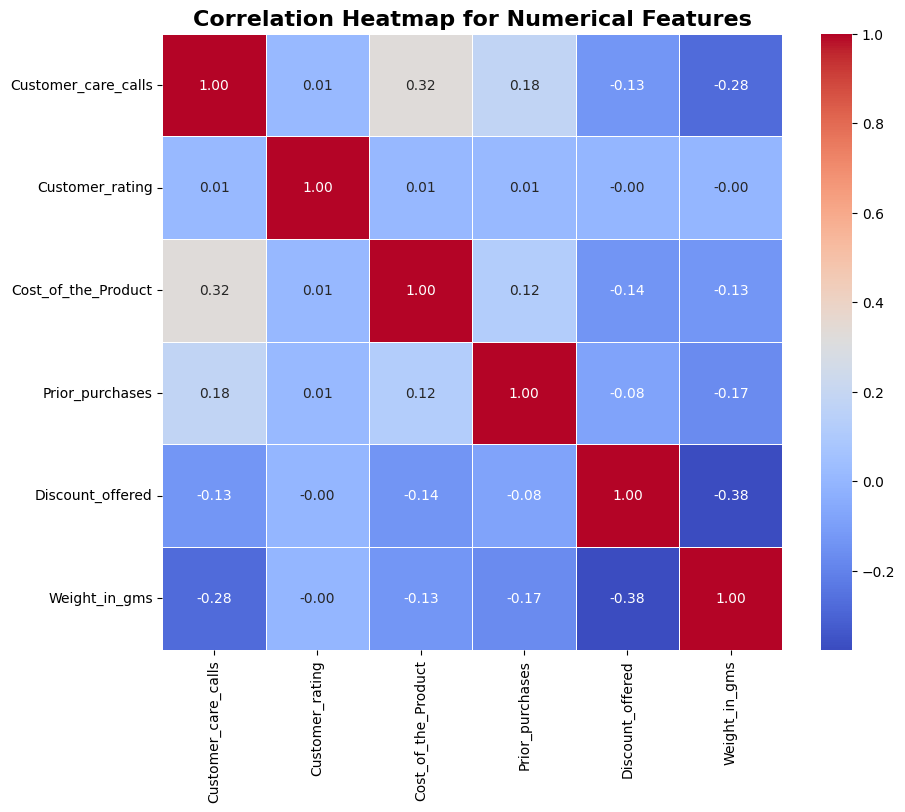

In [ ]:
numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16, fontweight='bold')
plt.show()


## Count Plot for Mode_of_Shipment

This count plot shows the distribution of different modes of shipment (e.g., air, road, etc.), giving insight into the preferred shipping methods for the products

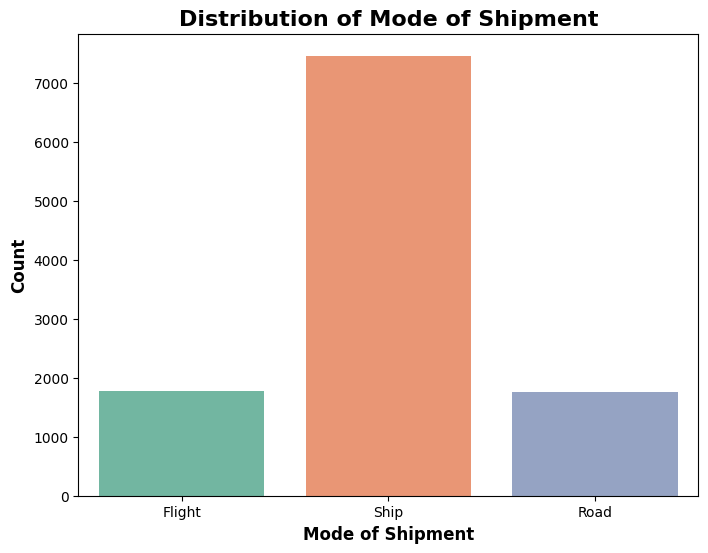

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Mode_of_Shipment', palette='Set2')
plt.title('Distribution of Mode of Shipment', fontsize=16, fontweight='bold')
plt.xlabel('Mode of Shipment', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


## Pairplot

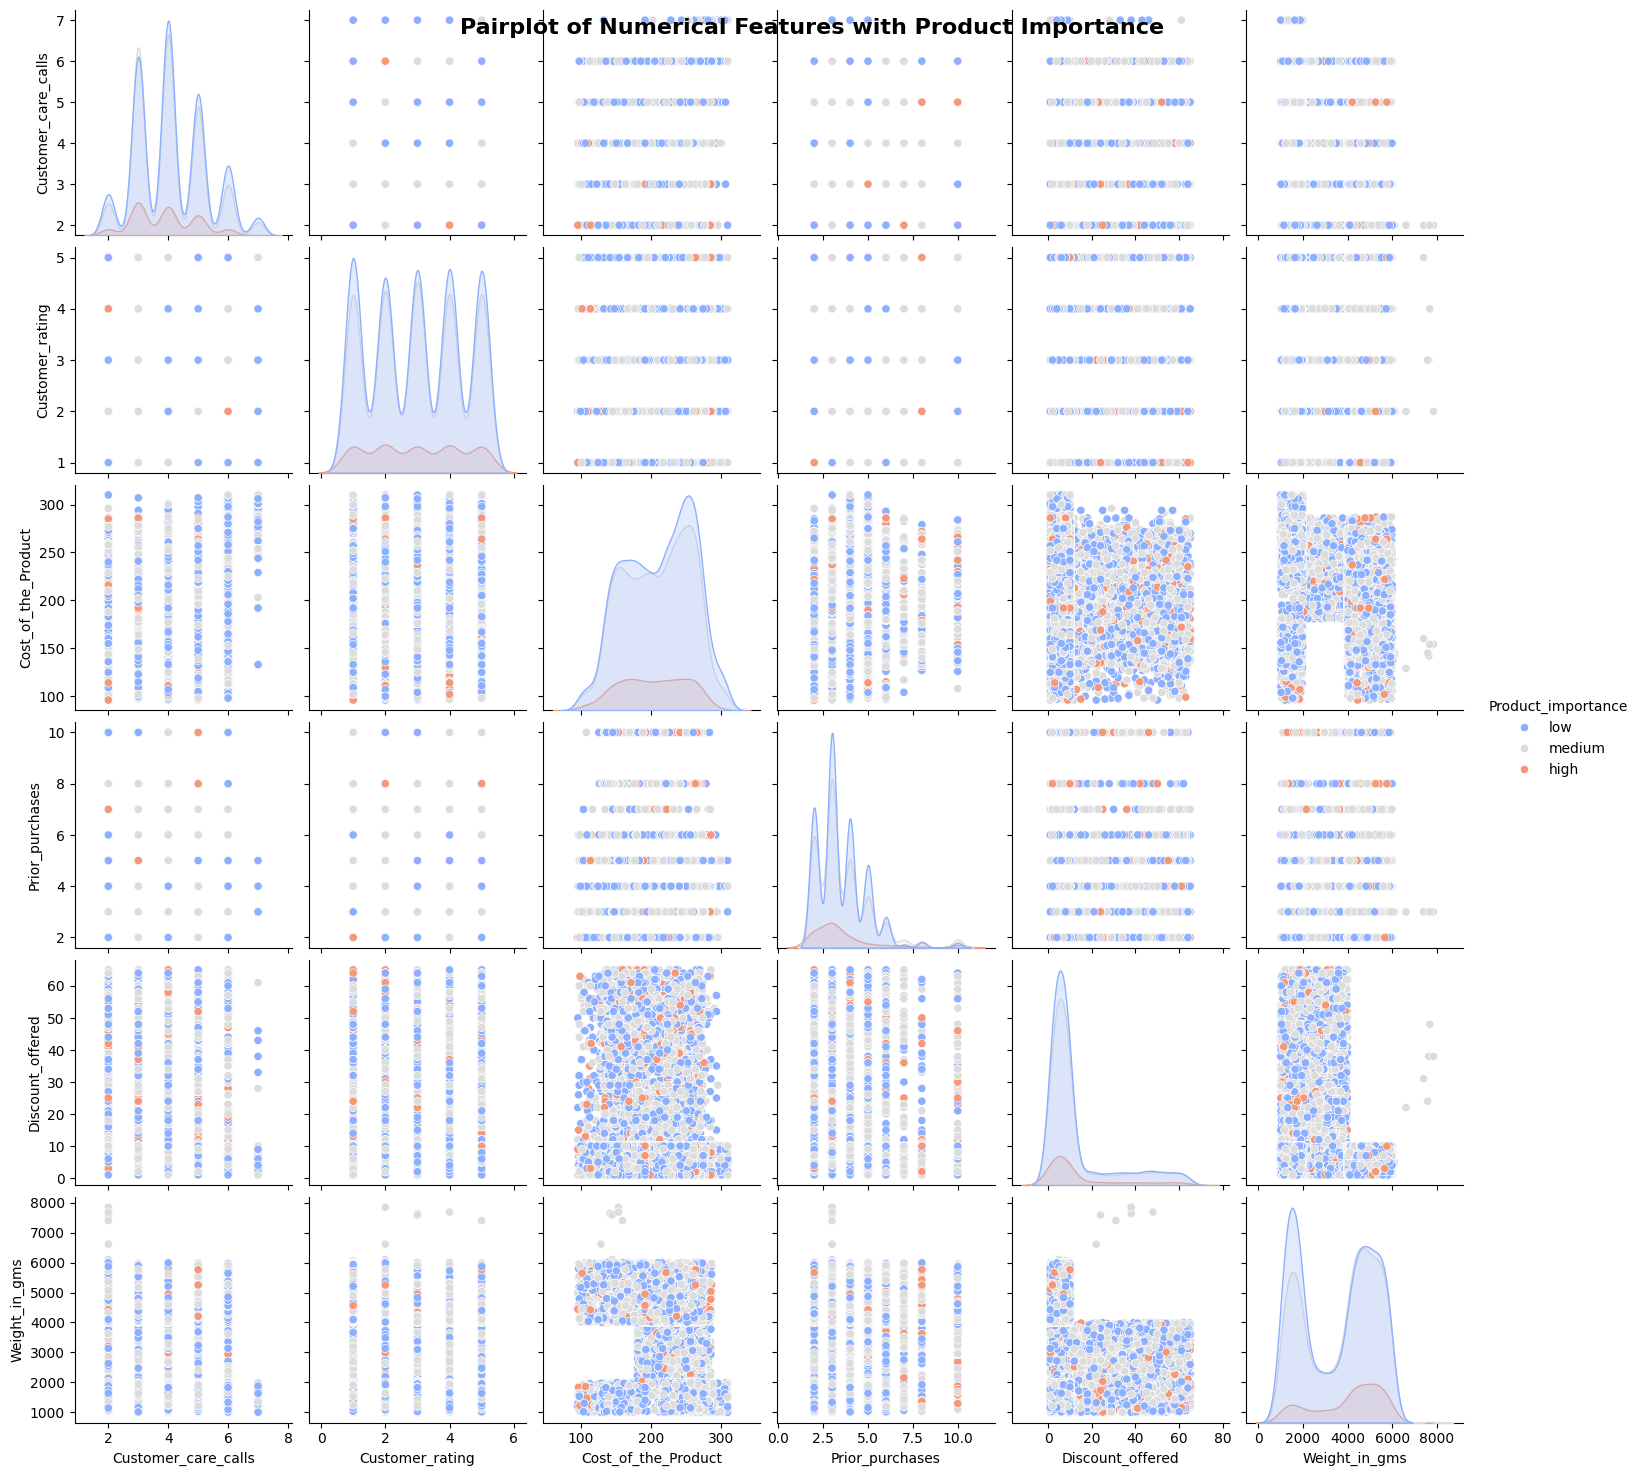

In [ ]:
numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

sns.pairplot(df[numerical_columns + ['Product_importance']], kind='scatter', hue='Product_importance', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features with Product Importance', fontsize=16, fontweight='bold')
plt.show()
